### Web Crusaders


Enter the district name to generate the crime visualizations:  Bidar


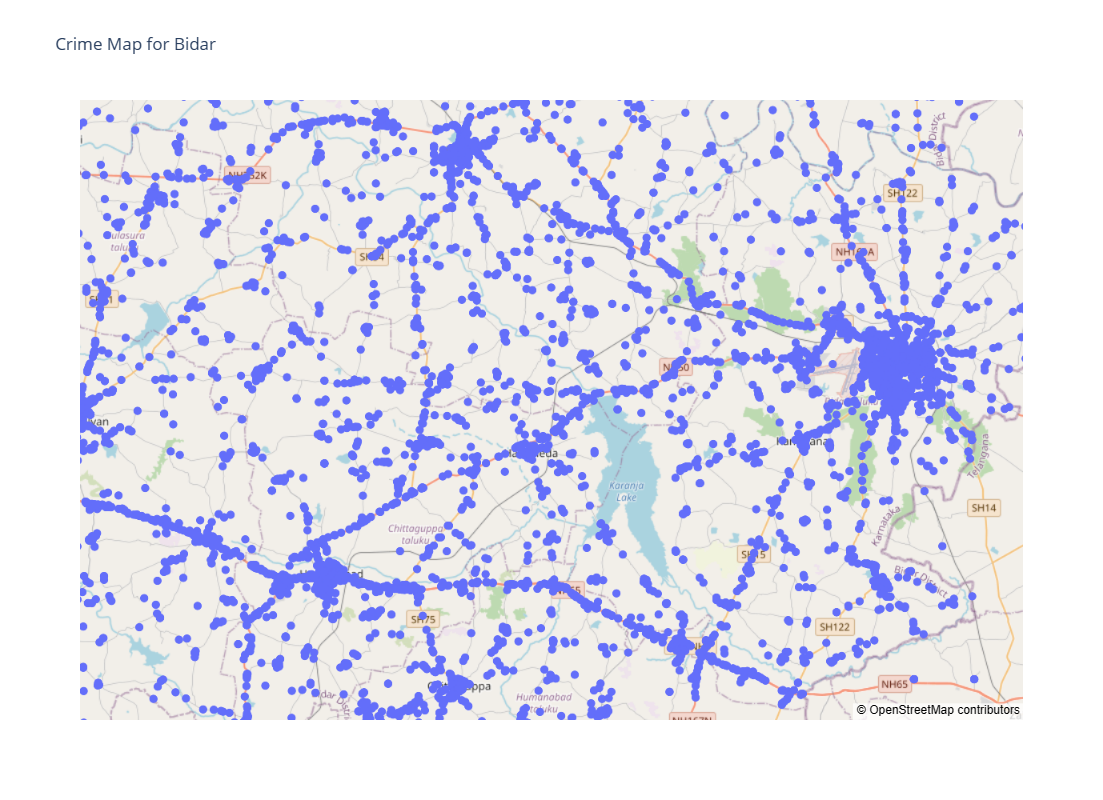

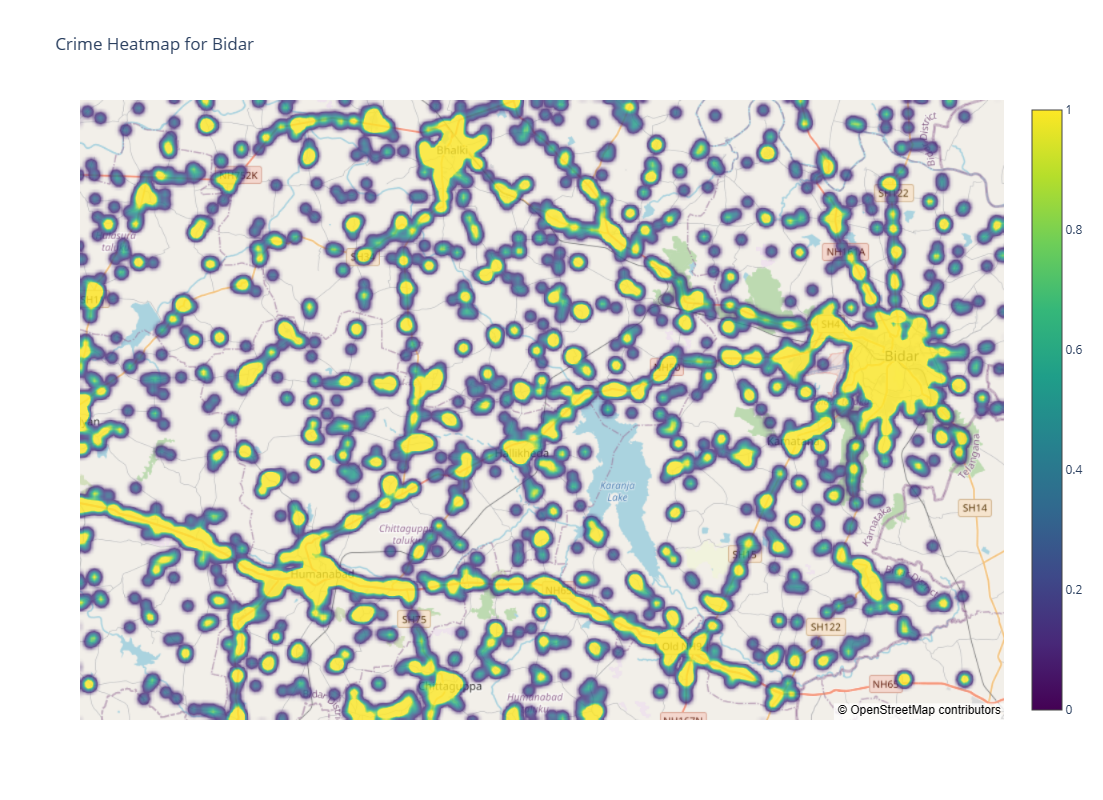


Location with the highest number of crimes in Bidar: latitude 18.131567, longitude 77.18392
Crime type that is highest at this location: Simple Hurt 


In [1]:
import psycopg2  # Importing the psycopg2 library for PostgreSQL database interaction
import pandas as pd  # Importing pandas library for data manipulation
import plotly.graph_objects as go  # Importing plotly for interactive visualizations

# Connect to PostgreSQL database
def connect_to_postgresql():
    """
    Function to establish a connection to PostgreSQL database.
    Returns:
        connection: PostgreSQL database connection object
    """
    # Database connection parameters
    connection = psycopg2.connect(
        host="dpg-cobrpren7f5s73ftpqrg-a.oregon-postgres.render.com",
        database="sheshank_sonji",
        user="sheshank_sonji_user",
        password="Lo2Ze5zVZSRPGxDLCg5WAKUXUfxo7rrZ"
    )
    return connection

def plot_crime_visualizations_for_district(district_name):
    """
    Function to generate crime map and heatmap visualizations for a specific district.

    Parameters:
        district_name (str): Name of the district for which visualizations are generated.
    """
    # Connect to PostgreSQL database
    connection = connect_to_postgresql()
    cursor = connection.cursor()  # Create a cursor to execute SQL queries

    # Fetch data for the specified district from the PostgreSQL database
    cursor.execute(f"SELECT * FROM tool1 WHERE district_Name = '{district_name}'")
    data = cursor.fetchall()  # Retrieve all rows from the executed query

    if not data:
        print(f"No data available for district: {district_name}")
        return

    # Convert fetched data into a Pandas DataFrame
    column_names = ['district_name', 'latitude', 'longitude', 'fir type', 'crimetype']
    district_data = pd.DataFrame(data, columns=column_names)

    # Check if district_data DataFrame is empty
    if district_data.empty:
        print(f"No data available for district: {district_name}")
        return
    
    # Calculate center coordinates for map visualization
    center = {
        'lat': district_data['latitude'].mean(),
        'lon': district_data['longitude'].mean()
    }
    
    # Plot Crime Map
    fig_map = go.Figure(go.Scattermapbox(
        lat=district_data['latitude'],
        lon=district_data['longitude'],
        mode='markers',
        marker=go.scattermapbox.Marker(size=9),
        text=district_data['fir type']
    ))
    
    # Configure Crime Map layout
    fig_map.update_layout(
        mapbox_style='open-street-map',
        mapbox_center=center,
        mapbox_zoom=10,
        height=800,
        width=1000,
        title=f"Crime Map for {district_name}"
    )
    
    # Display Crime Map
    fig_map.show()
    
    # Plot Heatmap
    fig_heatmap = go.Figure(go.Densitymapbox(
        lat=district_data['latitude'],
        lon=district_data['longitude'],
        radius=10,
        opacity=0.8,
        colorscale='Viridis',
        zmin=0,
        text=district_data['fir type']
    ))
    
    # Configure Heatmap layout
    fig_heatmap.update_layout(
        mapbox_style='open-street-map',
        mapbox_center=center,
        mapbox_zoom=10,
        height=800,
        width=1000,
        title=f"Crime Heatmap for {district_name}"
    )
    
    # Display Heatmap
    fig_heatmap.show()
    
    # Additional Analysis
    # Find location with the highest number of crimes and the most common crime type at that location
    location_with_highest_crimes = district_data.groupby(['latitude', 'longitude']).size().idxmax()
    highest_crime_type = district_data[
        (district_data['latitude'] == location_with_highest_crimes[0]) & 
        (district_data['longitude'] == location_with_highest_crimes[1])
    ]['fir type'].value_counts().idxmax()
    
    print(f"\nLocation with the highest number of crimes in {district_name}: latitude {location_with_highest_crimes[0]}, longitude {location_with_highest_crimes[1]}")
    print(f"Crime type that is highest at this location: {highest_crime_type}")

    # Close cursor and connection
    cursor.close()  # Close the cursor to release resources
    connection.close()  # Close the database connection

# Prompt user to enter the district name
user_input_district = input("Enter the district name to generate the crime visualizations: ")

# Call the function to generate crime visualizations for the specified district
plot_crime_visualizations_for_district(user_input_district.strip())
